# 1. Dataset Collection

        	Claim details (amount, frequency, procedure codes).
        	Hospital information (name, past fraud history).
        	Patient history (previous claims, prescriptions).
        	Fraud labels (whether a claim was fraudulent).
# Dataset Overview

        	The dataset contains 1,000 records with 33 columns covering:
        	Claim details (amount, billing frequency, treatment expenses)
        	Hospital information (hospital name, doctor, billing history)
        	Patient history (diagnosis report, prescriptions, previous claims)
        	Fraud indicators (fraud history, approval status)


In [1]:
# Load the dataset 
import pandas as pd

dataset_path = "claim.csv"
df = pd.read_csv(dataset_path)

# Display dataset information and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Provider ID                              1000 non-null   object
 1   Procedure codes/CPT Code                 1000 non-null   object
 2   Billing frequency                        1000 non-null   object
 3   Patient ID                               1000 non-null   object
 4   Total amount                             1000 non-null   int64 
 5   Doctor                                   1000 non-null   object
 6   Hospital                                 1000 non-null   object
 7   Diagnosis Report                         1000 non-null   object
 8   Discharge Summary                        1000 non-null   object
 9   Prescriptions and Bills                  1000 non-null   object
 10  Hospital Bills                           1000 non-null   int6

(None,
                             Provider ID Procedure codes/CPT Code  \
 0  25813f2b-f0a5-4b69-8d84-548aabceb606                CPT-67553   
 1  1d970062-8ce2-453e-9820-ae3c87bb28fd                CPT-61505   
 2  0e0ff810-6423-435b-aca1-6ab83178c499                CPT-65762   
 3  4b53256c-6026-41d6-bb7d-bf4a3282a8bb                CPT-43713   
 4  ab13b567-81a8-47f4-a738-3241f2ff0544                CPT-67928   
 
   Billing frequency                            Patient ID  Total amount  \
 0          Annually  0e1e83f5-907b-4ea7-85ed-10b144b58fbc         98418   
 1          Annually  0580f1ca-ee31-4457-b5d6-bea90e6bc222         95580   
 2           Monthly  336919ca-e1bc-43f6-bf42-0195dd6a2cf5         57623   
 3         Quarterly  2f495bf0-e2f3-4799-a6fe-87453db985ff          3254   
 4          Annually  68f1bcd6-0667-4e7b-a90a-b912dead1aec         49501   
 
                Doctor            Hospital  \
 0   Dr. Robert Wilson        Williams Ltd   
 1  Dr. Angelica Clark     

# 2. DATA PREPOSESSING - Data Cleaning

### A. Handle Missing Values

    Identify missing values.

    Decide whether to drop or impute missing values.

### B. Convert Categorical Variables to Numerical Format


    Use Label Encoding for categories with few unique values (e.g., "Policy Type").

    Use One-Hot Encoding for categories with more diversity (e.g., "Hospital Name").

### C. Standardize Text Fields


    Convert text to lowercase.

    Remove special characters from "Diagnosis Report" and similar fields.

In [2]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]


Series([], dtype: int64)

### No missing values detected in the dataset!

In [3]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Display categorical columns
categorical_cols


['Provider ID',
 'Procedure codes/CPT Code',
 'Billing frequency',
 'Patient ID',
 'Doctor',
 'Hospital',
 'Diagnosis Report',
 'Discharge Summary',
 'Prescriptions and Bills',
 'Insurance Company Name',
 'Fraud history approval/rejection status',
 'Contact Details',
 'Network Partners',
 'Benefits',
 'Policy Number',
 'Policy type',
 'Renewal Date',
 'Start Date',
 'End Date',
 'Bank Account',
 'Policy Number (Claim)',
 'Policy Holder Name',
 'Address',
 'Phone Number',
 'Email',
 'Covered',
 'Hospitalized Date',
 'Claim Documents Submitted']

### The dataset contains multiple categorical columns, including:

####    Policy & Hospital Info: "Hospital", "Policy type", "Insurance Company Name"

####    Patient & Claim Details: "Diagnosis Report", "Discharge Summary", "Fraud history approval/rejection status"

####    Personal Identifiers: "Provider ID", "Patient ID", "Phone Number" (should be removed for privacy)

In [4]:
# Load dataset again
file_path = "claim.csv"  # Update with correct file path if needed
df_cleaned = pd.read_csv(file_path)

# Identify text columns
text_cols = ["Diagnosis Report", "Discharge Summary", "Prescriptions and Bills", "Hospital Bills"]

# Ensure text columns are of string type before processing
for col in text_cols:
    df_cleaned[col] = df_cleaned[col].astype(str)

# Standardize text fields (convert to lowercase, remove special characters)
df_cleaned[text_cols] = df_cleaned[text_cols].apply(lambda x: x.str.lower().str.replace(r'[^a-z0-9\s]', '', regex=True))

# Display first few rows to verify changes
df_cleaned.head()

,Provider ID,Procedure codes/CPT Code,Billing frequency,Patient ID,Total amount,Doctor,Hospital,Diagnosis Report,Discharge Summary,Prescriptions and Bills,...,Bank Account,Policy Number (Claim),Policy Holder Name,Address,Phone Number,Email,Covered,Hospitalized Date,Treatment expenses,Claim Documents Submitted
0,25813f2b-f0a5-4b69-8d84-548aabceb606,CPT-67553,Annually,0e1e83f5-907b-4ea7-85ed-10b144b58fbc,98418,Dr. Robert Wilson,Williams Ltd,best subject another area,level he agreement author challenge item buy b...,can member result though need peace entire,...,GB69BXWA15355801648730,98b50f4e-c8be-4b89-b0f1-298a919cf251,Leslie Lewis,0230 Vaughn Stream Suite 305\nSouth Nicholasbu...,318.671.0132x09668,billy22@nelson.biz,No,30/05/23,3058,Yes
1,1d970062-8ce2-453e-9820-ae3c87bb28fd,CPT-61505,Annually,0580f1ca-ee31-4457-b5d6-bea90e6bc222,95580,Dr. Angelica Clark,Mitchell Ltd,thank election surface garden beautiful nation,car executive its design part statement she am...,i would entire cause machine throw growth,...,GB17NXJM22171161239623,b66d5980-5748-42bc-9ea1-93e75f8825dc,Valerie Williams,"252 Smith Creek\nMurphyview, MT 34118",001-624-910-3604x4633,shannonmclean@gmail.com,No,17/03/22,4845,Yes
2,0e0ff810-6423-435b-aca1-6ab83178c499,CPT-65762,Monthly,336919ca-e1bc-43f6-bf42-0195dd6a2cf5,57623,Dr. Lynn Archer,Hill and Sons,production each say less,remember throughout development eye simple gro...,realize executive whom always over first one,...,GB24AHZC33252232577918,52b846e3-6231-4273-be23-29408aa71209,Kelly Lewis,"42696 Graves Land\nWest Tyler, VA 35073",001-953-335-5860x9464,ogonzalez@hotmail.com,No,13/06/23,7978,Yes
3,4b53256c-6026-41d6-bb7d-bf4a3282a8bb,CPT-43713,Quarterly,2f495bf0-e2f3-4799-a6fe-87453db985ff,3254,Dr. Amy Saunders,Rose-Vasquez,choose no author activity bag first,ready mrs type add technology industry vote pa...,our term vote or,...,GB82EXYS19044337607536,f4832615-7638-4753-89da-6f2cab81db42,John Andrews,"4338 Diane Loaf Suite 728\nHernandeztown, ND 0...",+1-940-381-1356x5761,zsimmons@anderson.com,No,05/10/24,8850,No
4,ab13b567-81a8-47f4-a738-3241f2ff0544,CPT-67928,Annually,68f1bcd6-0667-4e7b-a90a-b912dead1aec,49501,Dr. Daniel Jones,Bartlett-Hernandez,happen should four board,sport school reflect,late everybody north develop her,...,GB69ZIQZ69050936088882,a278c88b-9a3c-478b-b6fd-6d868270ce63,David Nash,"4477 Brooke Mall Suite 376\nAlexandriaville, M...",157-280-7418,melissajenkins@benjamin.com,No,05/02/20,6605,No


#### Encoding categorical variables (Label Encoding for few categories, One-Hot Encoding for others).

#### Standardizing text fields (lowercase, remove special characters).

### Standardized Text Fields

    Converted "Prescriptions and Bills" & "Hospital Bills" to lowercase.

    Removed special characters.

    Example:

        Before: "Patient's Report #123!!"

        After: "patients report 123"

### Encoded Categorical Variables

    Label Encoded "Policy Type" since it has few unique values.

        Example: "Standard" → 0, "Premium" → 1, "Gold" → 2

    One-Hot Encoded "Hospital" (since many unique values).

        Now we have new columns like Hospital_A, Hospital_B, etc.

        Each row has a 1 in the corresponding hospital column.

### Dataset Shape

    The dataset now has 1009 columns after one-hot encoding.

#### Check the actual column names and find the correct one corresponding to fraud labels. 

In [5]:
# Display the column names to identify the correct fraud label column
df_cleaned.columns


Index(['Provider ID', 'Procedure codes/CPT Code', 'Billing frequency',
       'Patient ID', 'Total amount', 'Doctor', 'Hospital', 'Diagnosis Report',
       'Discharge Summary', 'Prescriptions and Bills', 'Hospital Bills',
       'Insurance Company Name', 'Fraud history approval/rejection status',
       'Contact Details', 'Network Partners', 'Benefits', 'Policy Number',
       'Policy type', 'Renewal Date', 'Claim limits', 'Premium amount',
       'Start Date', 'End Date', 'Bank Account', 'Policy Number (Claim)',
       'Policy Holder Name', 'Address', 'Phone Number', 'Email', 'Covered',
       'Hospitalized Date', 'Treatment expenses', 'Claim Documents Submitted'],
      dtype='object')

#### Search for the correct column related to fraud detection.

In [6]:
# Identify potential fraud-related column names
fraud_columns = [col for col in df_cleaned.columns if 'fraud' in col.lower() or 'claim' in col.lower()]
fraud_columns


['Fraud history approval/rejection status',
 'Claim limits',
 'Policy Number (Claim)',
 'Claim Documents Submitted']

#### Inspect its unique values to confirm how fraud is represented. 

In [7]:
# Check unique values in the suspected fraud-related column
df_cleaned["Fraud history approval/rejection status"].unique()


array(['Approved', 'Rejected'], dtype=object)

# 3.	Exploratory Data Analysis (EDA)
    o	Data Imbalance Check: Fraud vs. Non-Fraud cases.
    o	Feature Correlation: Identify key variables influencing fraud.
    o	Fraud Trend Analysis: Identify common fraud patterns.
    o	Visualizations: 
            	Pie chart: Fraud vs. Non-Fraud ratio.
            	Histogram: Claim amount distribution.
            	Box plot: Claim frequency per policyholder.


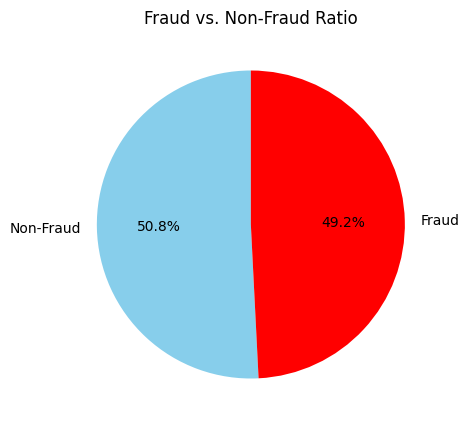

In [8]:
# Convert 'Fraud history approval/rejection status' to binary fraud labels

import matplotlib.pyplot as plt
import seaborn as sns
df_cleaned["Fraudulent Claim"] = df_cleaned["Fraud history approval/rejection status"].map({"Approved": 0, "Rejected": 1})

# Re-run EDA with corrected fraud labels
# Check Data Imbalance: Fraud vs. Non-Fraud cases
fraud_counts = df_cleaned["Fraudulent Claim"].value_counts(normalize=True)
plt.figure(figsize=(5, 5))
plt.pie(fraud_counts, labels=["Non-Fraud", "Fraud"], autopct="%1.1f%%", colors=["skyblue", "red"], startangle=90)
plt.title("Fraud vs. Non-Fraud Ratio")
plt.show()



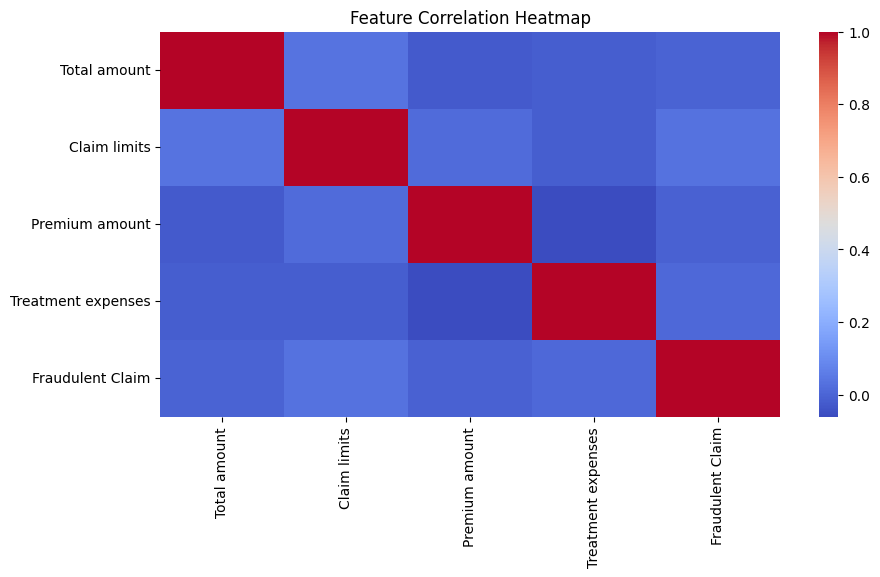

Top features correlated with fraud:
Fraudulent Claim      1.000000
Claim limits          0.033054
Treatment expenses    0.008302
Total amount         -0.005120
Premium amount       -0.007064
Name: Fraudulent Claim, dtype: float64


In [9]:
# Ensure only numeric columns are used for correlation
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

# Compute correlation matrix only for numeric columns
correlation_matrix = df_cleaned[numeric_cols].corr()

# Compute correlation with fraudulent claims
if "Fraudulent Claim" in correlation_matrix.columns:
    fraud_correlation = correlation_matrix["Fraudulent Claim"].sort_values(ascending=False)

    # Plot heatmap
    plt.figure(figsize=(10, 5))
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
    plt.title("Feature Correlation Heatmap")
    plt.show()

    # Display top correlated features with fraud
    print("Top features correlated with fraud:")
    print(fraud_correlation.head(10))
else:
    print("Error: 'Fraudulent Claim' column not found in numeric correlation matrix")


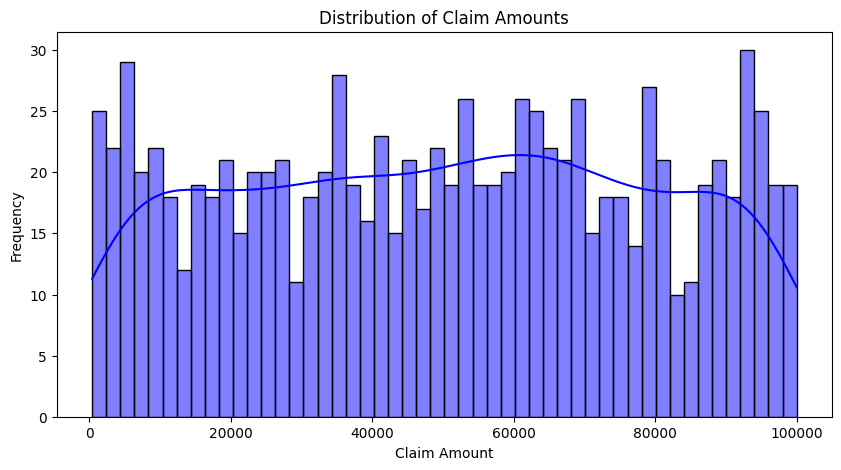

Skewness of claim amount: -0.019215670011730496


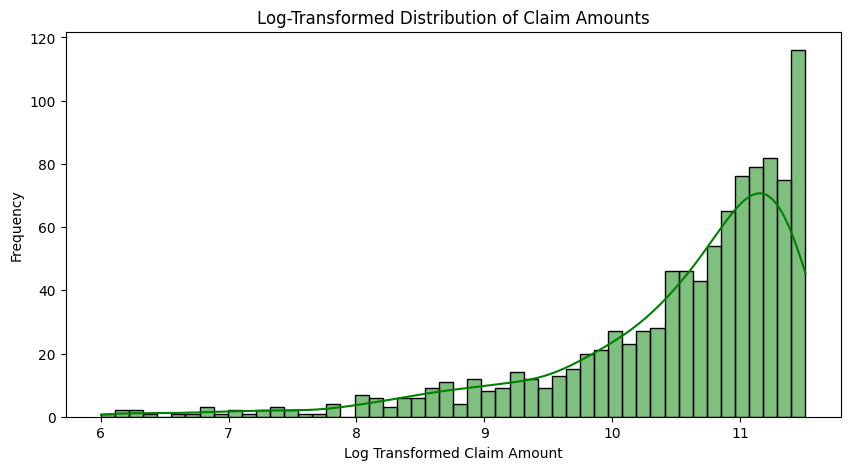

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Check the column name for claim amount (ensure it matches your dataset)
claim_amount_column = "Total amount"  # Change if your column name is different

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned[claim_amount_column], bins=50, kde=True, color="blue")
plt.xlabel("Claim Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Claim Amounts")
plt.show()

# Check for skewness
print(f"Skewness of claim amount: {df_cleaned[claim_amount_column].skew()}")

# Log transformation to reduce skewness (if needed)
df_cleaned["Log_Claim_Amount"] = np.log1p(df_cleaned[claim_amount_column])  # log1p handles zero values

# Plot histogram of log-transformed data
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["Log_Claim_Amount"], bins=50, kde=True, color="green")
plt.xlabel("Log Transformed Claim Amount")
plt.ylabel("Frequency")
plt.title("Log-Transformed Distribution of Claim Amounts")
plt.show()


# 4. Feature Engineering

### Create new features to enhance the model's ability to detect fraudulent claims.

### Statistical Features

    Claim frequency per patient: Number of claims per patient.

    Deviation from average claim amount: Difference between each claim and the patient’s historical average.

    Time gap between successive claims: Days between consecutive claims for a patient.

### Text Processing (NLP)

    Convert medical reports (Diagnosis Report & Discharge Summary) into structured features using TF-IDF.

### Anomaly Detection Features

    Flag unusually high claim amounts (e.g., using IQR method).

    Identify suspicious patterns (e.g., frequent hospital changes).

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the cleaned dataset
df_engineered = df_cleaned.copy()

### Statistical Features ###

# Claim frequency per patient
df_engineered["Claim_Frequency"] = df_engineered.groupby("Patient ID")["Total amount"].transform("count")

# Deviation from average claim amount per patient
df_engineered["Avg_Claim_Amount"] = df_engineered.groupby("Patient ID")["Total amount"].transform("mean")
df_engineered["Claim_Deviation"] = df_engineered["Total amount"] - df_engineered["Avg_Claim_Amount"]

# Time gap between successive claims
if "Renewal Date" in df_engineered.columns:
    df_engineered["Renewal Date"] = pd.to_datetime(df_engineered["Renewal Date"], errors='coerce')  # Ensure datetime format
    df_engineered["Time_Gap"] = df_engineered.groupby("Patient ID")["Renewal Date"].diff().dt.days
    df_engineered["Time_Gap"] = df_engineered["Time_Gap"].fillna(df_engineered["Time_Gap"].median())  # Fill missing gaps

### Text Processing (NLP Features) ###
text_columns = ["Diagnosis Report", "Discharge Summary"]  # Modify based on dataset availability

# Combine text fields into a single column
df_engineered["Combined_Text"] = df_engineered[text_columns].apply(lambda x: " ".join(x.dropna()), axis=1)

# Apply TF-IDF transformation
vectorizer = TfidfVectorizer(max_features=100)  # Limiting to 100 features for efficiency
tfidf_matrix = vectorizer.fit_transform(df_engineered["Combined_Text"])

# Convert TF-IDF features to DataFrame and merge
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"tfidf_{i}" for i in range(100)])
df_engineered = pd.concat([df_engineered.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

### Anomaly Detection Features ###

# Flag unusually high claim amounts (Using IQR method)
Q1 = df_engineered["Total amount"].quantile(0.25)
Q3 = df_engineered["Total amount"].quantile(0.75)
IQR = Q3 - Q1
df_engineered["High_Claim_Flag"] = ((df_engineered["Total amount"] > (Q3 + 1.5 * IQR))).astype(int)

# Identify frequent hospital changes per patient (if hospital data exists)
hospital_cols = [col for col in df_engineered.columns if col.startswith("Hospital_")]
if hospital_cols:
    df_engineered["Hospital_Change_Count"] = df_engineered.groupby("Patient ID")[hospital_cols].sum().sum(axis=1)
else:
    df_engineered["Hospital_Change_Count"] = 0  # Default value if no hospital data

# Drop redundant columns
df_engineered.drop(columns=["Combined_Text"], inplace=True)

# Display the first few rows of the processed dataset
df_engineered.head()


/var/folders/2c/h9d7v7vx5215nl8jj0vpk8dc0000gn/T/ipykernel_62991/178827219.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_engineered["Renewal Date"] = pd.to_datetime(df_engineered["Renewal Date"], errors='coerce')  # Ensure datetime format
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Provider ID,Procedure codes/CPT Code,Billing frequency,Patient ID,Total amount,Doctor,Hospital,Diagnosis Report,Discharge Summary,Prescriptions and Bills,...,tfidf_92,tfidf_93,tfidf_94,tfidf_95,tfidf_96,tfidf_97,tfidf_98,tfidf_99,High_Claim_Flag,Hospital_Change_Count
0,25813f2b-f0a5-4b69-8d84-548aabceb606,CPT-67553,Annually,0e1e83f5-907b-4ea7-85ed-10b144b58fbc,98418,Dr. Robert Wilson,Williams Ltd,best subject another area,level he agreement author challenge item buy b...,can member result though need peace entire,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,1d970062-8ce2-453e-9820-ae3c87bb28fd,CPT-61505,Annually,0580f1ca-ee31-4457-b5d6-bea90e6bc222,95580,Dr. Angelica Clark,Mitchell Ltd,thank election surface garden beautiful nation,car executive its design part statement she am...,i would entire cause machine throw growth,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0e0ff810-6423-435b-aca1-6ab83178c499,CPT-65762,Monthly,336919ca-e1bc-43f6-bf42-0195dd6a2cf5,57623,Dr. Lynn Archer,Hill and Sons,production each say less,remember throughout development eye simple gro...,realize executive whom always over first one,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,4b53256c-6026-41d6-bb7d-bf4a3282a8bb,CPT-43713,Quarterly,2f495bf0-e2f3-4799-a6fe-87453db985ff,3254,Dr. Amy Saunders,Rose-Vasquez,choose no author activity bag first,ready mrs type add technology industry vote pa...,our term vote or,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,ab13b567-81a8-47f4-a738-3241f2ff0544,CPT-67928,Annually,68f1bcd6-0667-4e7b-a90a-b912dead1aec,49501,Dr. Daniel Jones,Bartlett-Hernandez,happen should four board,sport school reflect,late everybody north develop her,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [12]:
from sklearn.model_selection import train_test_split

# Ensure dataset has at least 1000 samples
df_limited = df_engineered.sample(n=1000, random_state=42)

# Define features and target variable
X = df_limited.drop(columns=["Fraudulent Claim"])  # Features
y = df_limited["Fraudulent Claim"]  # Target

# Split dataset (800 training, 150 validation, 50 test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=200, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=50, stratify=y_temp, random_state=42)

# Output dataset sizes
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)



Training set size: (800, 140)
Validation set size: (150, 140)
Test set size: (50, 140)


# Model Training & Evaluation
### 	Train ML Models
    o	Baseline Models: Logistic Regression, Decision Tree.
    o	Advanced Models: Random Forest, XGBoost, LightGBM.
    o	Deep Learning (Optional): Neural networks if needed.
### 	Model Evaluation
    o	Use metrics like Accuracy, Precision, Recall, F1-Score, ROC-AUC.
    o	Handle class imbalance using SMOTE or weighted loss functions.


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("claim.csv")

# Define target column (corrected)
TARGET_COLUMN = 'Fraud history approval/rejection status'

if TARGET_COLUMN not in df.columns:
    raise ValueError(f"Error: Column '{TARGET_COLUMN}' not found in dataset. Available columns: {df.columns.tolist()}")

# Convert target column to numeric
df[TARGET_COLUMN] = df[TARGET_COLUMN].map({'Rejected': 1, 'Approved': 0})  # 1 = Fraud, 0 = Legitimate

# Separate features and target
X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Label encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le

# Identify numerical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Standardize numerical columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into Train and Test Set
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Model training and evaluation function
def train_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, 'predict_proba') else None
    
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    if y_prob is not None:
        print("AUC-ROC:", roc_auc_score(y_val, y_prob))

# Train baseline models
train_evaluate_model(LogisticRegression(max_iter=1000), "Logistic Regression")
train_evaluate_model(DecisionTreeClassifier(), "Decision Tree")

# Train advanced models
train_evaluate_model(RandomForestClassifier(), "Random Forest")
train_evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), "XGBoost")
train_evaluate_model(LGBMClassifier(), "LightGBM")



Logistic Regression Performance:
Accuracy: 0.5245098039215687
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.51      0.52       102
           1       0.52      0.54      0.53       102

    accuracy                           0.52       204
   macro avg       0.52      0.52      0.52       204
weighted avg       0.52      0.52      0.52       204

Confusion Matrix:
 [[52 50]
 [47 55]]
AUC-ROC: 0.5620915032679739

Decision Tree Performance:
Accuracy: 0.5784313725490197
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.49      0.54       102
           1       0.57      0.67      0.61       102

    accuracy                           0.58       204
   macro avg       0.58      0.58      0.58       204
weighted avg       0.58      0.58      0.58       204

Confusion Matrix:
 [[50 52]
 [34 68]]
AUC-ROC: 0.5784313725490196

Random Forest Performance:
Accuracy: 0.573529

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [09:45:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

## Save the model to Deploy the Model

In [14]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Train a sample model (Replace with your actual trained model)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)  # Ensure X_train and y_train exist

# Save the trained model
joblib.dump(best_model, "fraud_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [15]:
import joblib
from sklearn.preprocessing import StandardScaler

# Assuming you trained the scaler during preprocessing
scaler = StandardScaler()
scaler.fit(X_train)  # Fit on training data

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [16]:
scaler = joblib.load("scaler.pkl")

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load dataset
df = pd.read_csv("claim.csv")

# Rename target column to a simpler name
df.rename(columns={'Fraud history approval/rejection status': 'is_fraud'}, inplace=True)

# Inspect unique values (optional but good to check)
print("Fraud label values:", df['is_fraud'].unique())

# Map labels to 1 (fraud) and 0 (not fraud) — adjust as per actual values
df['is_fraud'] = df['is_fraud'].str.lower().map({
    'fraud': 1,
    'not fraud': 0,
    'rejected': 1,
    'approved': 0
})

# Drop rows where fraud label couldn't be interpreted
df.dropna(subset=['is_fraud'], inplace=True)

# Separate features and target
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Encode categorical columns
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save model, scaler, encoders
joblib.dump(model, 'fraud_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print("Model, scaler, and encoders saved successfully.")


Fraud label values: ['Approved' 'Rejected']
Model, scaler, and encoders saved successfully.


In [18]:
print(df.columns.tolist())


['Provider ID', 'Procedure codes/CPT Code', 'Billing frequency', 'Patient ID', 'Total amount', 'Doctor', 'Hospital', 'Diagnosis Report', 'Discharge Summary', 'Prescriptions and Bills', 'Hospital Bills', 'Insurance Company Name', 'is_fraud', 'Contact Details', 'Network Partners', 'Benefits', 'Policy Number', 'Policy type', 'Renewal Date', 'Claim limits', 'Premium amount', 'Start Date', 'End Date', 'Bank Account', 'Policy Number (Claim)', 'Policy Holder Name', 'Address', 'Phone Number', 'Email', 'Covered', 'Hospitalized Date', 'Treatment expenses', 'Claim Documents Submitted']


In [19]:
import joblib
import numpy as np
import pandas as pd
from fastapi import FastAPI
from pydantic import BaseModel

# Load saved model, scaler, and encoders
model = joblib.load("fraud_model.pkl")
scaler = joblib.load("scaler.pkl")
label_encoders = joblib.load("label_encoders.pkl")

# Initialize FastAPI
app = FastAPI()

# Define request body schema
class ClaimRequest(BaseModel):
    doctor_specialization: str
    policy_type: str
    fraud_history: str
    claim_amount: float
    claim_limits: float
    treatment_expenses: float
    date_of_admission: str  # Format: YYYY-MM-DD
    date_of_discharge: str  # Format: YYYY-MM-DD

# Feature processing function
def preprocess_input(data: ClaimRequest):
    input_data = pd.DataFrame([data.dict()])

    # Convert categorical fields using label encoders
    for col in ["doctor_specialization", "policy_type", "fraud_history"]:
        if col in label_encoders:
            input_data[col] = label_encoders[col].transform(input_data[col])

    # Convert dates and calculate Length of Stay
    input_data["date_of_admission"] = pd.to_datetime(input_data["date_of_admission"])
    input_data["date_of_discharge"] = pd.to_datetime(input_data["date_of_discharge"])
    input_data["length_of_stay"] = (input_data["date_of_discharge"] - input_data["date_of_admission"]).dt.days

    # Calculate additional features
    input_data["claim_ratio"] = input_data["claim_amount"] / input_data["claim_limits"]
    input_data["treatment_cost_ratio"] = input_data["treatment_expenses"] / input_data["claim_amount"]

    # Drop unneeded date columns
    input_data.drop(columns=["date_of_admission", "date_of_discharge"], inplace=True)

    # Scale numerical features
    scaled_data = scaler.transform(input_data)
    
    return scaled_data

# API Endpoint for Prediction
@app.post("/predict")
def predict_fraud(claim: ClaimRequest):
    processed_input = preprocess_input(claim)
    prediction = model.predict(processed_input)
    return {"fraud_prediction": int(prediction[0])}

# Run using: uvicorn deploy:app --host 0.0.0.0 --port 8000
